In [189]:
import pandas as pd
import numpy as np
import seaborn as sns

In [190]:
df = pd.read_csv(r'C:\Users\Ahsan\bdsf\housing_prices_assignment.csv')

In [209]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [198]:
df_cleaned1 = df.dropna(axis=1)
#df_cleaned1 = df_cleaned1.dropna()

#64 columns left after we dropped all columns with missing data

#Removing outliers using quantiles
outliers_low = df["SalePrice"].quantile(0.01)
outliers_high  = df["SalePrice"].quantile(0.99)

df_cleaned1 = df_cleaned1[(df_cleaned1["SalePrice"] < outliers_high) & (df_cleaned1["SalePrice"] > outliers_low)]
df_cleaned1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1430 non-null   int64 
 1   MSSubClass     1430 non-null   int64 
 2   MSZoning       1430 non-null   object
 3   LotArea        1430 non-null   int64 
 4   Street         1430 non-null   object
 5   LotShape       1430 non-null   object
 6   LandContour    1430 non-null   object
 7   Utilities      1430 non-null   object
 8   LotConfig      1430 non-null   object
 9   LandSlope      1430 non-null   object
 10  Neighborhood   1430 non-null   object
 11  Condition1     1430 non-null   object
 12  Condition2     1430 non-null   object
 13  BldgType       1430 non-null   object
 14  HouseStyle     1430 non-null   object
 15  OverallQual    1430 non-null   int64 
 16  OverallCond    1430 non-null   int64 
 17  YearBuilt      1430 non-null   int64 
 18  YearRemodAdd   1430 non-null

In [199]:
#lets use the top 4 most positively correlated and negatively correlated numeric values to predict the sales price using regression
feature_names = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass' , 'OverallCond']
X = df_cleaned1[feature_names]
y = np.log(df_cleaned1.SalePrice)
# we log transform our predictions because the saleprice data distribution is skewed


In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [201]:
#import the required library
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor() #define model

model.fit(X_train, y_train) #fit the model to the data (AKA TRAINING)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(model.score(X_train, y_train))) #accuracy on training data
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test))) #accuracy on test data

Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.78


In [202]:
print ("R^2 is: \n", model.score(X_test, y_test))

actual_values = y_test.tolist()
model_predict = model.predict(X_test)




R^2 is: 
 0.7784929668761245


In [203]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(actual_values, model_predict))

RMSE is: 
 0.02615856706568837


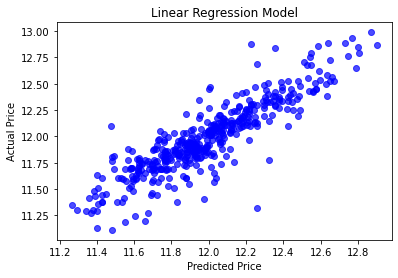

In [204]:
import matplotlib.pyplot as plt
plt.scatter(model_predict, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [205]:

for cn in range(0,len(actual_values)):
    print ("Original : %s Predicted: %s - Difference : %s" % (np.exp(actual_values[cn]), np.exp(model_predict[cn]),np.exp(actual_values[cn])- np.exp(model_predict[cn]) ))


Original : 180999.99999999985 Predicted: 183908.80448404897 - Difference : -2908.80448404912
Original : 124999.99999999991 Predicted: 113751.38857576439 - Difference : 11248.611424235525
Original : 249999.99999999983 Predicted: 285387.36427667615 - Difference : -35387.36427667632
Original : 139999.9999999999 Predicted: 128385.75001424157 - Difference : 11614.249985758346
Original : 159999.9999999999 Predicted: 148103.1327866925 - Difference : 11896.867213307414
Original : 86999.99999999997 Predicted: 137155.29709747442 - Difference : -50155.29709747445
Original : 102000.00000000003 Predicted: 130817.20019173826 - Difference : -28817.20019173823
Original : 188000.00000000012 Predicted: 190799.28939026716 - Difference : -2799.2893902670476
Original : 129499.99999999991 Predicted: 105407.05821854621 - Difference : 24092.9417814537
Original : 185000.00000000006 Predicted: 184529.09829102026 - Difference : 470.9017089797999
Original : 228949.99999999997 Predicted: 154042.9910211298 - Differ

We have analyzed US Housing data and tried to make a model for predicting the SalePrice of a house using 8 features given below ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass' , 'OverallCond'] We used Random Forest Regressor for our model and after training the model was tested on our test data which gave us an R^2 of 0.778 and a Root Mean Square Error RMSE of 0.0263. This shows that our model is decently good at predicting the SalePrice of the House. Comparison of actual vs predicted values of SalePrice is presented as a log normalized scatter plot as well as raw prediction values and thier difference. 
